In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv('Car details.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
df.shape
df.describe()
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [4]:
df['mileage']=df['mileage'].str.replace("km/kg","kmpl")
df['mileage']=df['mileage'].str.replace("kmpl","").astype('float')
df['max_power']=df['max_power'].str.replace("bhp","")
df['engine']=df['engine'].str.replace("CC","")
df=df.drop(['torque'],axis=1)

In [5]:
df.loc[df['owner']=='First Owner']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.2,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061,57.5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8120,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.1,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70,5.0


In [6]:
df['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

In [7]:
df.loc[df['owner']=='Second Owner']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796,37,4.0
10,Renault Duster 110PS Diesel RxL,2014,500000,68000,Diesel,Individual,Manual,Second Owner,19.01,1461,108.45,5.0
11,Maruti Zen LX,2005,92000,100000,Petrol,Individual,Manual,Second Owner,17.30,993,60,5.0
12,Maruti Swift Dzire VDi,2009,280000,140000,Diesel,Individual,Manual,Second Owner,19.30,1248,73.9,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8104,Honda City 2017-2020 VTEC,2006,160000,70000,Petrol,Individual,Manual,Second Owner,16.90,1497,100,5.0
8105,Honda City 1.3 EXI,2004,135000,120000,Petrol,Individual,Manual,Second Owner,13.00,1343,90,5.0
8106,Hyundai Verna 1.6 SX,2012,450000,128000,Diesel,Individual,Manual,Second Owner,22.32,1582,126.32,5.0
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.1,5.0


In [8]:
df.loc[df['owner']=='Third Owner']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78,5.0
62,Hyundai i10 Magna,2011,190000,110000,Petrol,Individual,Manual,Third Owner,20.36,1197,78.9,5.0
65,Ford Figo 1.2P Titanium MT,2017,600000,25000,Petrol,Individual,Manual,Third Owner,18.16,1196,86.8,5.0
98,Maruti Alto LX BSIII,2008,120000,68000,Petrol,Dealer,Manual,Third Owner,19.70,796,46.3,5.0
103,Maruti Eeco 7 Seater Standard BSIV,2016,270000,100000,Petrol,Individual,Manual,Third Owner,15.37,1196,73,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8076,Maruti Wagon R LXI BSIII,2006,150000,50000,Petrol,Individual,Manual,Third Owner,14.00,1061,64,5.0
8079,Tata Indigo LS,2007,90177,129000,Diesel,Individual,Manual,Third Owner,17.00,1405,70,5.0
8082,Ford Fiesta 1.4 Duratorq EXI,2007,125000,110000,Diesel,Individual,Manual,Third Owner,17.80,1399,68,5.0
8094,Tata Manza Aura (ABS) Safire BS IV,2012,200000,80868,Petrol,Individual,Manual,Third Owner,13.70,1368,88.8,5.0


In [9]:
df.loc[df['owner']=='Fourth & Above Owner']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
123,Maruti Swift Dzire VDi,2012,370000,175000,Diesel,Individual,Manual,Fourth & Above Owner,19.30,1248,73.9,5.0
126,Maruti Alto LXi,2008,105000,65000,Petrol,Individual,Manual,Fourth & Above Owner,19.70,796,46.3,5.0
275,Hyundai i20 Asta 1.4 CRDi,2015,500000,70000,Diesel,Individual,Manual,Fourth & Above Owner,22.54,1396,88.73,5.0
327,Hyundai i20 1.2 Asta,2010,254999,80000,Petrol,Individual,Manual,Fourth & Above Owner,17.00,1197,80,5.0
328,Maruti Zen LXI,2003,65000,60000,Petrol,Individual,Manual,Fourth & Above Owner,17.30,993,60,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7916,Hyundai i20 Asta 1.4 CRDi,2014,600000,100000,Diesel,Individual,Manual,Fourth & Above Owner,22.54,1396,88.73,5.0
8017,Tata Indica V2 2001-2011 DLS BSIII,2008,60000,120000,Diesel,Individual,Manual,Fourth & Above Owner,17.88,1396,52.8,5.0
8041,Maruti Wagon R LXI Minor,2007,90000,110000,Petrol,Individual,Manual,Fourth & Above Owner,18.90,1061,67,5.0
8067,Mahindra Scorpio M2DI,2011,360000,100000,Diesel,Individual,Manual,Fourth & Above Owner,13.50,2179,115,5.0


In [10]:
df.loc[df['owner']=='Test Drive Car']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
4383,Volkswagen Vento 1.5 TDI Highline BSIV,2019,1350000,5400,Diesel,Dealer,Manual,Test Drive Car,22.27,1498,108.6,5.0
4950,Audi A6 35 TFSI Matrix,2019,6223000,7800,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798,187.74,5.0
4951,Audi A6 35 TFSI Matrix,2019,5923000,11500,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798,187.74,5.0
4952,Audi A6 35 TFSI Matrix,2019,6523000,23600,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798,187.74,5.0
6220,Honda Civic ZX,2019,2000000,24857,Petrol,Dealer,Automatic,Test Drive Car,16.50,1799,139.46,5.0


In [11]:
df.groupby('owner')['mileage'].mean()

owner
First Owner             19.902403
Fourth & Above Owner    17.394625
Second Owner            18.713624
Test Drive Car          16.910000
Third Owner             17.922000
Name: mileage, dtype: float64

In [12]:
df['mileage'] = df['mileage'].fillna(df.groupby('owner')['mileage'].transform('mean'))

In [13]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage            0
engine           221
max_power        215
seats            221
dtype: int64

In [14]:
df['engine'].mode()

0    1248 
Name: engine, dtype: object

In [15]:
df['max_power'].mode()

0    74 
Name: max_power, dtype: object

In [16]:
df['mileage'] = df['mileage'].fillna(df.groupby('owner')['mileage'].transform('mean'))

In [17]:
df.describe()

,year,selling_price,km_driven,mileage,seats
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.403778,5.416719
std,4.044249,8.062534e+05,5.655055e+04,3.985233,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.800000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.277500,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,14.000000


In [18]:
num4 = df['max_power'].mode()[0]
df['max_power'].fillna(num4, inplace=True)

In [19]:
num3 = df['engine'].mode()[0]
df['engine'].fillna(num3, inplace=True)

In [20]:
df.engine = df.engine.astype(float).fillna(0.0)

In [21]:
num2 = df['seats'].mode()[0]
df['seats'].fillna(num2, inplace=True)

In [22]:
df['max_power']=df['max_power'].str.get(0).str.replace(' ','')
df['max_power']=df['max_power'].str.get(0).str.replace(' ','').astype(float)

In [23]:
df['max_power'].astype(float)

0       7.0
1       1.0
2       7.0
3       9.0
4       8.0
       ... 
8123    8.0
8124    1.0
8125    7.0
8126    7.0
8127    7.0
Name: max_power, Length: 8128, dtype: float64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   float64
 9   engine         8128 non-null   float64
 10  max_power      8127 non-null   float64
 11  seats          8128 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [25]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        1
seats            0
dtype: int64

In [26]:
df.describe(include= 'object')

,name,fuel,seller_type,transmission,owner
count,8128,8128,8128,8128,8128
unique,2058,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,129,4402,6766,7078,5289


In [27]:
df[df['max_power'].isna()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
4933,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9,796.0,NaN,8.0


In [28]:
df['max_power'] = df.groupby(['engine','max_power'], sort=False)['max_power'].apply(lambda x: x.fillna(x.mode().iloc[0]))

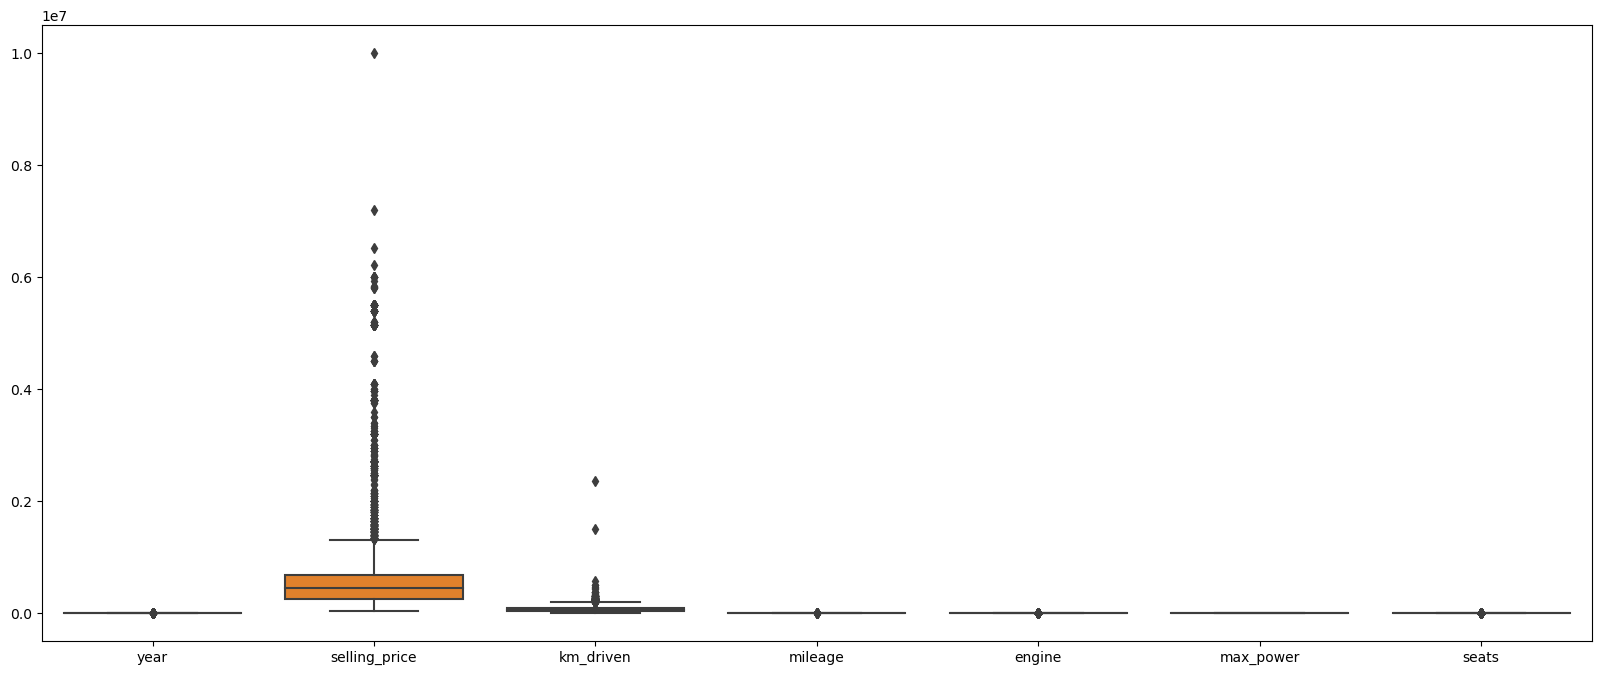

In [29]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df,width=0.8)
plt.show()

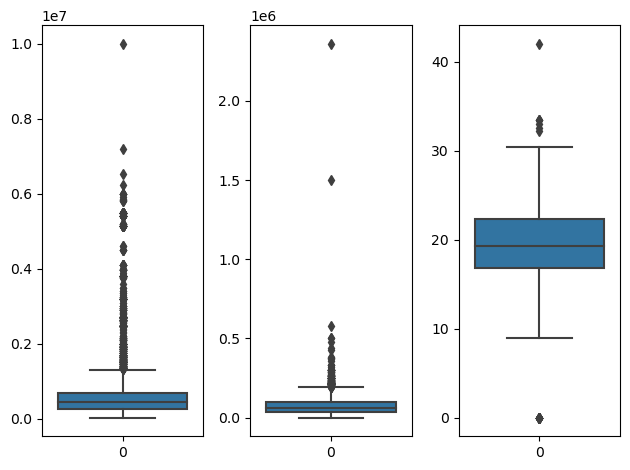

In [30]:
plt.subplot(1,3,1)
sns.boxplot(data=df['selling_price'])
plt.subplot(1,3,2)
sns.boxplot(data=df['km_driven'])
plt.subplot(1,3,3)
sns.boxplot(data=df['mileage'])
plt.tight_layout()
plt.show()

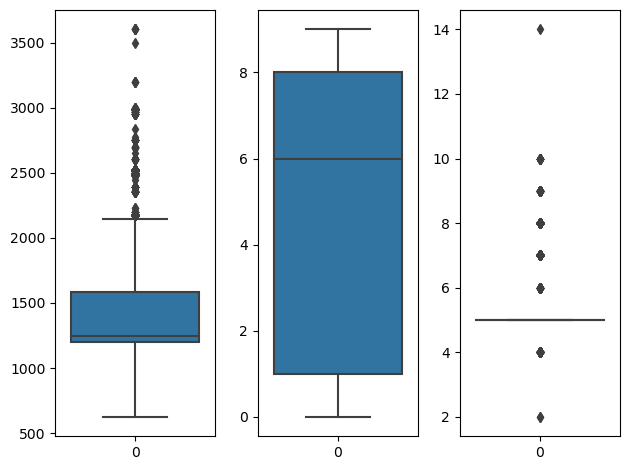

In [31]:
plt.subplot(1,3,1)
sns.boxplot(data=df['engine'])
plt.subplot(1,3,2)
sns.boxplot(data=df['max_power'])
plt.subplot(1,3,3)
sns.boxplot(data=df['seats'])
plt.tight_layout()
plt.show()

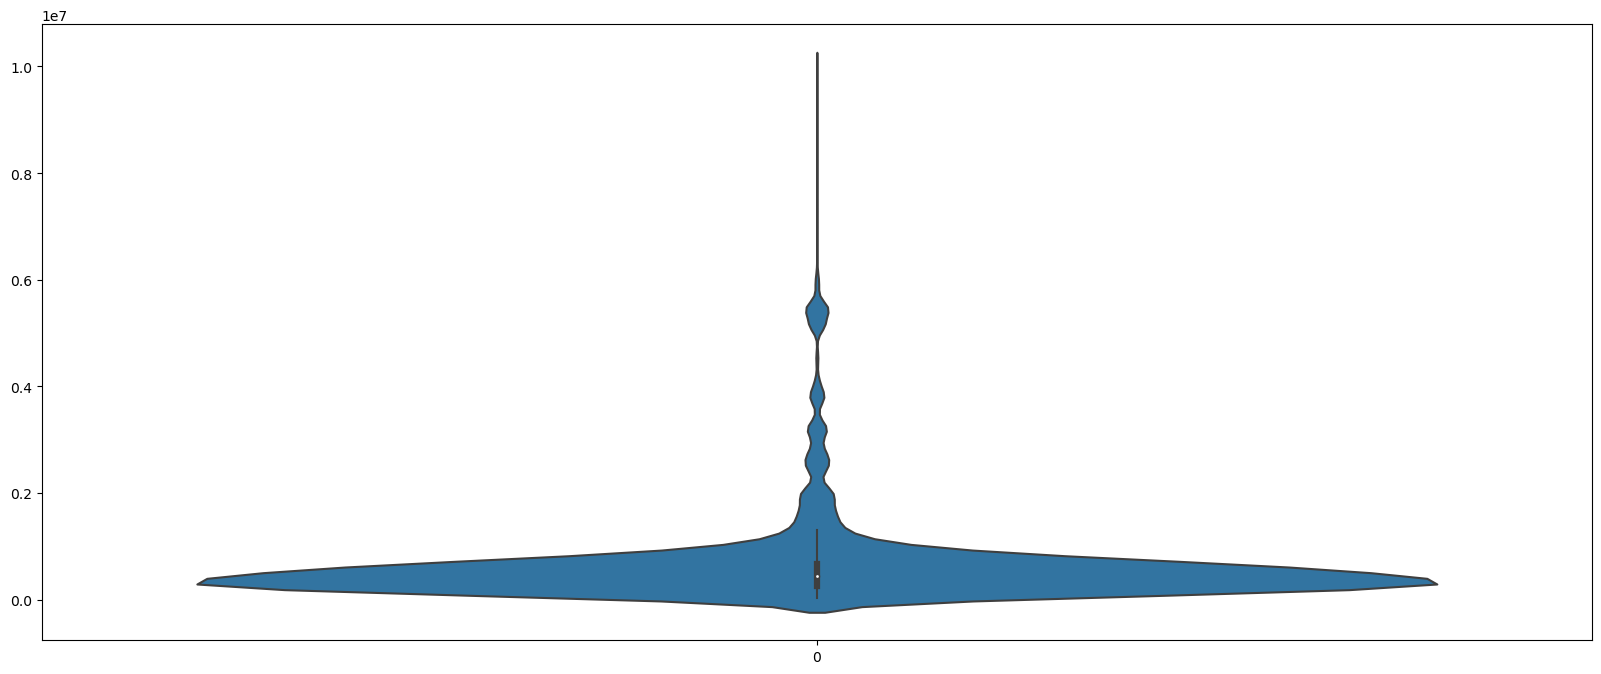

In [32]:
plt.figure(figsize=(20,8))
sns.violinplot(data=df['selling_price'])
plt.show()

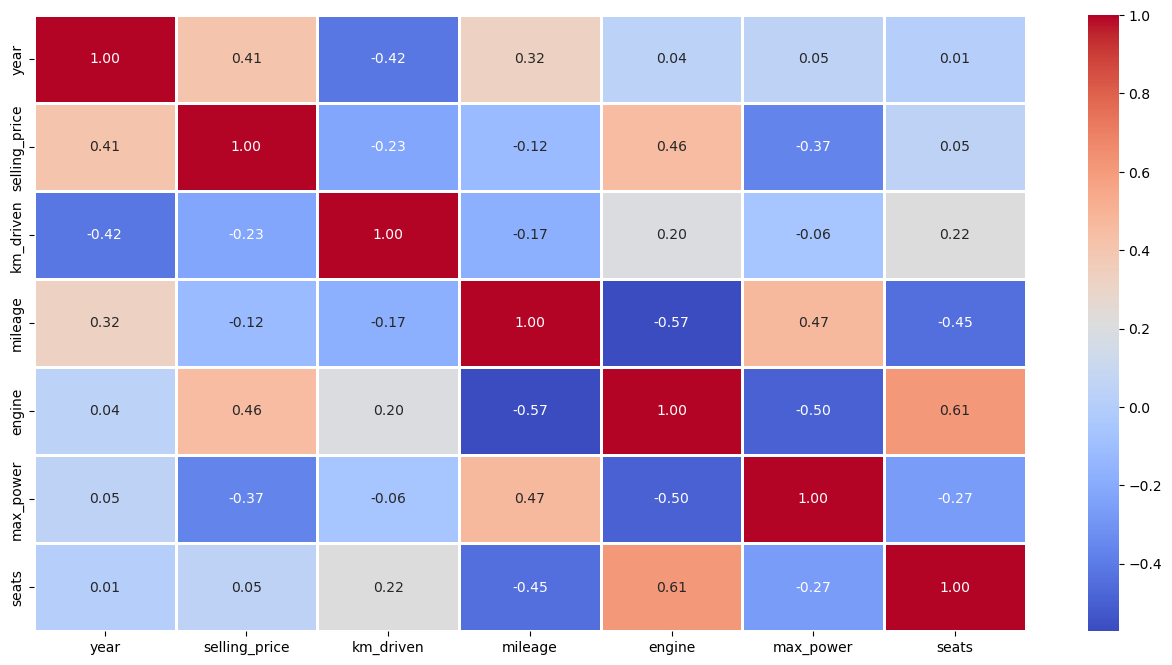

In [33]:
fig,ax=plt.subplots(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,fmt='1.2f',annot_kws={'size':10},linewidth=1,cmap='coolwarm')
plt.show()

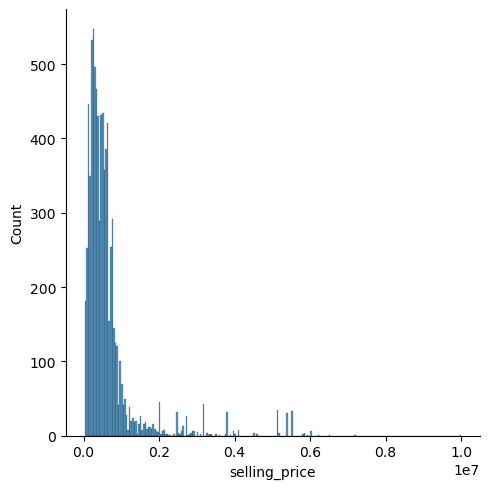

In [34]:
car_price=df['selling_price']
sns.displot(car_price)
plt.show()

In [35]:
import scipy.stats as st
print(np.percentile(df['selling_price'],91))
print(np.percentile(df['selling_price'],92))
print(np.percentile(df['selling_price'],93))
print(np.percentile(df['selling_price'],94))
print(np.percentile(df['selling_price'],95))
print(np.percentile(df['selling_price'],96))
print(np.percentile(df['selling_price'],97))
print(np.percentile(df['selling_price'],98))
print(np.percentile(df['selling_price'],99))
print(np.percentile(df['selling_price'],100))

1100000.0
1224200.0000000007
1400000.0
1650000.0
1950000.0
2475000.0
2900000.0
3800000.0
5200000.0
10000000.0


In [36]:
p_05 = df['selling_price'].quantile(0.05) # 5th quantile
p_99 = df['selling_price'].quantile(0.999) # 99th quantile

df['selling_price'].clip(p_05, p_99, inplace=True)

<Axes: xlabel='selling_price', ylabel='Density'>

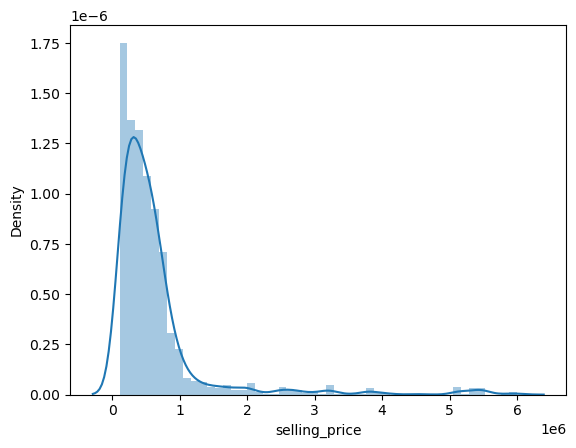

In [37]:
sns.distplot(df['selling_price'])

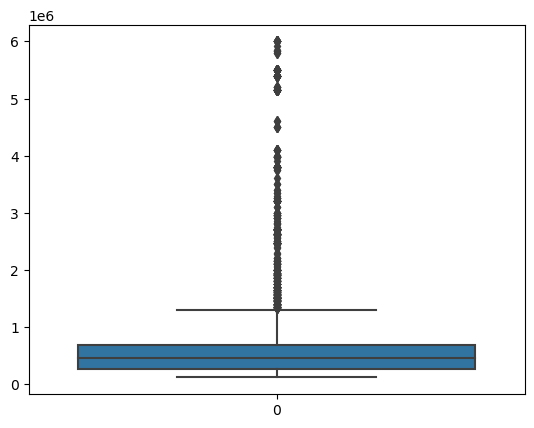

In [38]:
sns.boxplot(df["selling_price"])
plt.show()

In [39]:
df[df['km_driven']==2.360457e+06]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
3486,Hyundai i20 Asta 1.2,2007,550000,2360457,Petrol,Individual,Manual,Second Owner,18.6,1197.0,8.0,5.0


In [40]:
df['name'].value_counts()

Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Skoda Fabia 1.4 TDI Ambiente                         1
Mahindra Scorpio VLX 2WD AT BSIII                    1
Renault KWID Climber 1.0 AMT                         1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV         1
Name: name, Length: 2058, dtype: int64

In [41]:
df2=df[df['name']=='Hyundai i20 Asta 1.2']

In [42]:
df2

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
813,Hyundai i20 Asta 1.2,2015,630000,35000,Petrol,Individual,Manual,First Owner,18.6,1197.0,8.0,5.0
1485,Hyundai i20 Asta 1.2,2014,565000,70000,Petrol,Individual,Manual,Second Owner,18.6,1197.0,8.0,5.0
2346,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5,1197.0,8.0,5.0
2976,Hyundai i20 Asta 1.2,2015,600000,100000,Petrol,Individual,Manual,First Owner,18.6,1197.0,8.0,5.0
3486,Hyundai i20 Asta 1.2,2007,550000,2360457,Petrol,Individual,Manual,Second Owner,18.6,1197.0,8.0,5.0
4034,Hyundai i20 Asta 1.2,2015,450000,60000,Petrol,Individual,Manual,First Owner,18.6,1197.0,8.0,5.0
4191,Hyundai i20 Asta 1.2,2015,500000,70000,Petrol,Individual,Manual,First Owner,18.6,1197.0,8.0,5.0
5499,Hyundai i20 Asta 1.2,2015,515000,120000,Petrol,Individual,Manual,Second Owner,18.6,1197.0,8.0,5.0
6273,Hyundai i20 Asta 1.2,2018,700000,28451,Petrol,Dealer,Manual,First Owner,18.6,1197.0,8.0,5.0
6390,Hyundai i20 Asta 1.2,2013,370000,120000,Petrol,Individual,Manual,First Owner,18.5,1197.0,8.0,5.0


In [43]:
print(np.percentile(df['km_driven'],91))
print(np.percentile(df['km_driven'],92))
print(np.percentile(df['km_driven'],93))
print(np.percentile(df['km_driven'],94))
print(np.percentile(df['km_driven'],95))
print(np.percentile(df['km_driven'],96))
print(np.percentile(df['km_driven'],97))
print(np.percentile(df['km_driven'],98))
print(np.percentile(df['km_driven'],99))
print(np.percentile(df['km_driven'],100))

120000.0
125980.16000000002
136055.0000000003
143000.0
150000.0
160000.0
175000.0
195000.0
225000.0
2360457.0


In [44]:
print(np.percentile(df['km_driven'],99.1))
print(np.percentile(df['km_driven'],99.2))
print(np.percentile(df['km_driven'],99.3))
print(np.percentile(df['km_driven'],99.4))
print(np.percentile(df['km_driven'],99.5))
print(np.percentile(df['km_driven'],99.6))
print(np.percentile(df['km_driven'],99.7))
print(np.percentile(df['km_driven'],99.8))
print(np.percentile(df['km_driven'],99.9))
print(np.percentile(df['km_driven'],100))

231232.36599999995
247968.00000000076
250000.0
250000.0
264364.99999999977
277460.00000000093
300000.0
316190.0000000014
379544.3240000018
2360457.0


In [45]:
p_05 = df['km_driven'].quantile(0.05) # 5th quantile
p_95 = df['km_driven'].quantile(0.95) # 95th quantile

df['km_driven'].clip(p_05, p_95, inplace=True)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,7.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,1.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,7.0,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,9.0,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,8.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,8.0,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,1.0,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,7.0,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,7.0,5.0


In [46]:
df[df['name']=='Hyundai i20 Asta 1.2']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
813,Hyundai i20 Asta 1.2,2015,630000,35000,Petrol,Individual,Manual,First Owner,18.6,1197.0,8.0,5.0
1485,Hyundai i20 Asta 1.2,2014,565000,70000,Petrol,Individual,Manual,Second Owner,18.6,1197.0,8.0,5.0
2346,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5,1197.0,8.0,5.0
2976,Hyundai i20 Asta 1.2,2015,600000,100000,Petrol,Individual,Manual,First Owner,18.6,1197.0,8.0,5.0
3486,Hyundai i20 Asta 1.2,2007,550000,150000,Petrol,Individual,Manual,Second Owner,18.6,1197.0,8.0,5.0
4034,Hyundai i20 Asta 1.2,2015,450000,60000,Petrol,Individual,Manual,First Owner,18.6,1197.0,8.0,5.0
4191,Hyundai i20 Asta 1.2,2015,500000,70000,Petrol,Individual,Manual,First Owner,18.6,1197.0,8.0,5.0
5499,Hyundai i20 Asta 1.2,2015,515000,120000,Petrol,Individual,Manual,Second Owner,18.6,1197.0,8.0,5.0
6273,Hyundai i20 Asta 1.2,2018,700000,28451,Petrol,Dealer,Manual,First Owner,18.6,1197.0,8.0,5.0
6390,Hyundai i20 Asta 1.2,2013,370000,120000,Petrol,Individual,Manual,First Owner,18.5,1197.0,8.0,5.0


In [47]:
num4 = df['max_power'].mode()[0]
df['max_power'].fillna(num4, inplace=True)

In [48]:
df.drop(df.index[3486],inplace=True)
df.reset_index(drop=True)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,7.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,1.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,7.0,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,9.0,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,8.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8122,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,8.0,5.0
8123,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,1.0,5.0
8124,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,7.0,5.0
8125,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,7.0,5.0


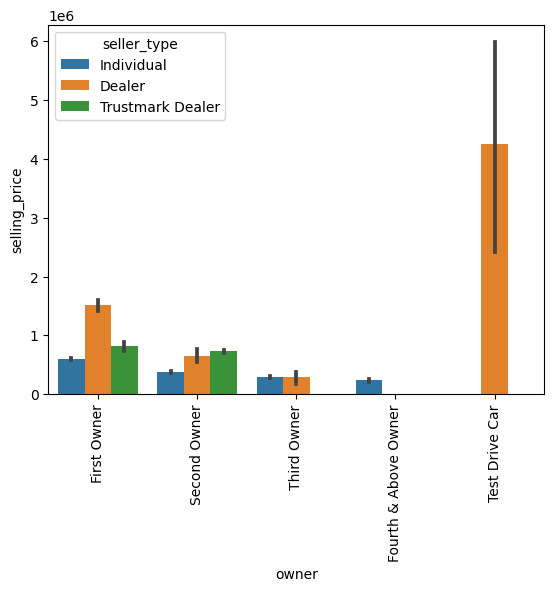

In [49]:
sns.barplot(data = df, x = 'owner', y = 'selling_price', hue='seller_type')
plt.xticks(rotation=90)
plt.show()

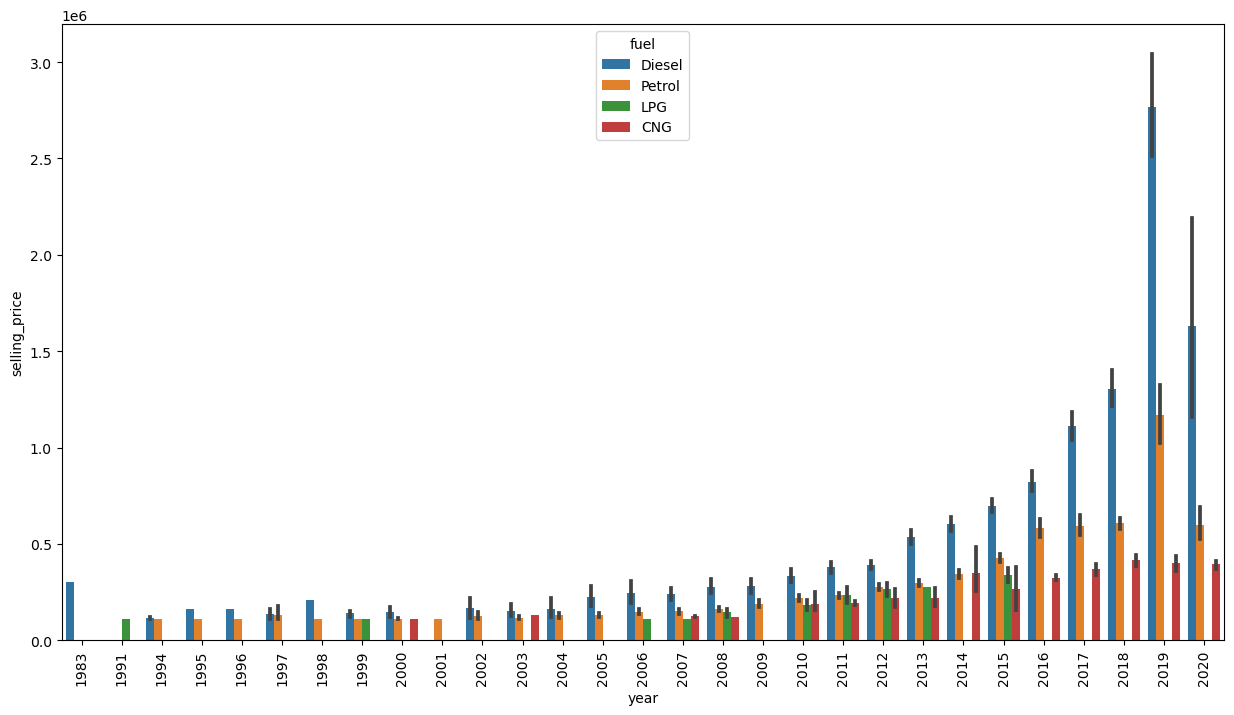

In [50]:
plt.figure(figsize=(15,8))
sns.barplot(data=df,x='year',y='selling_price',hue='fuel')
plt.xticks(rotation=90)
plt.show()

In [51]:
numeric_features=[features for features in df.columns if df[features].dtype !='O']
categorical_features=[features for features in df.columns if df[features].dtype =='O']
print(numeric_features)
print(categorical_features)

['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
['name', 'fuel', 'seller_type', 'transmission', 'owner']


In [52]:
for col in categorical_features:
    print(df[col].value_counts())

Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Skoda Fabia 1.4 TDI Ambiente                         1
Mahindra Scorpio VLX 2WD AT BSIII                    1
Renault KWID Climber 1.0 AMT                         1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV         1
Name: name, Length: 2058, dtype: int64
Diesel    4402
Petrol    3630
CNG         57
LPG         38
Name: fuel, dtype: int64
Individual          6765
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64
Manual       7077
Automatic    1050
Name: transmission, dtype: int64
First Owner             5289
Second Owner            2104
Third Owner              555
Fourth &

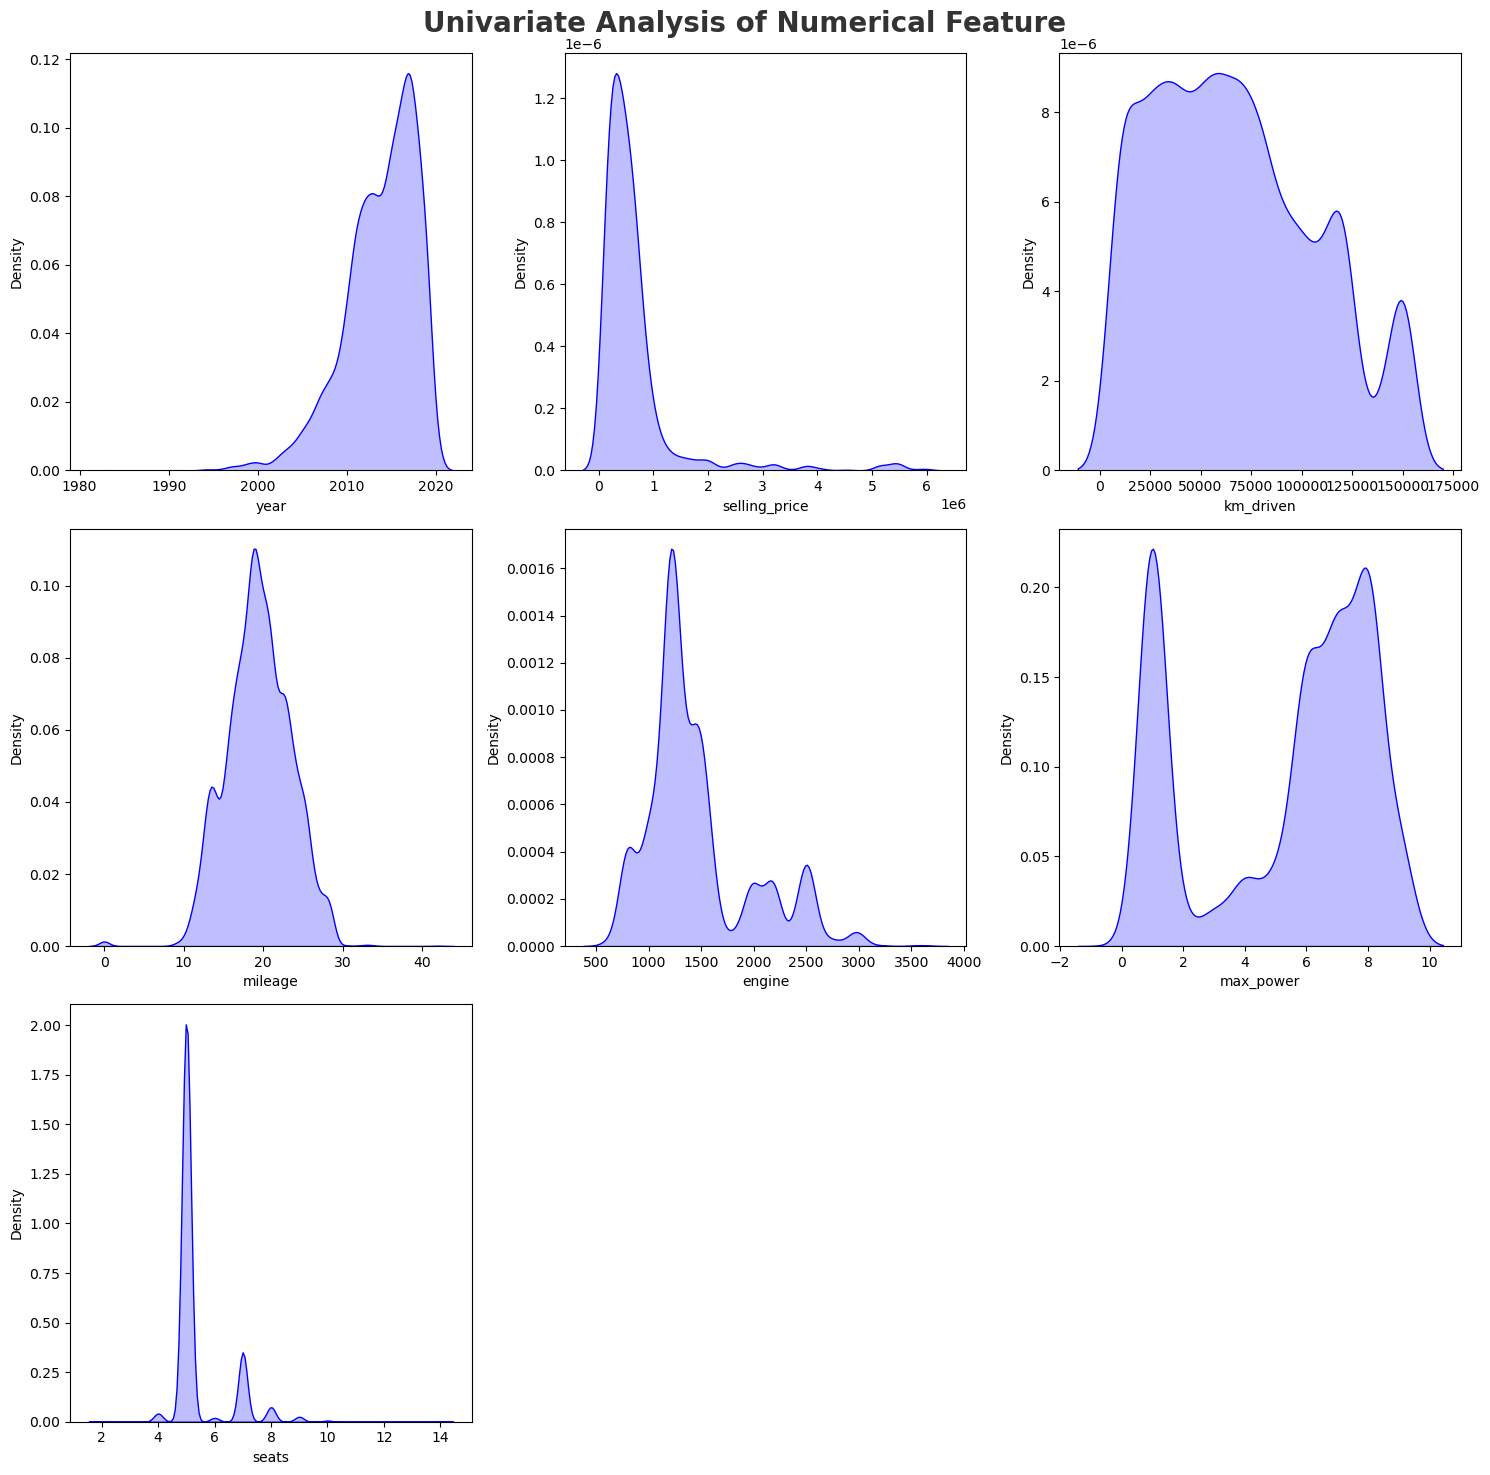

In [53]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Feature',fontsize=20,fontweight='bold',alpha=0.8)

for i in range(0,len(numeric_features)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True,color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [54]:
df.corr()

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.411989,-0.518669,0.318640,0.035751,0.047412,0.010135
selling_price,0.411989,1.000000,-0.298398,-0.128282,0.459477,-0.370001,0.046553
km_driven,-0.518669,-0.298398,1.000000,-0.185874,0.216196,-0.053083,0.241864
mileage,0.318640,-0.128282,-0.185874,1.000000,-0.572459,0.467069,-0.448958
engine,0.035751,0.459477,0.216196,-0.572459,1.000000,-0.495530,0.612210
max_power,0.047412,-0.370001,-0.053083,0.467069,-0.495530,1.000000,-0.265739
seats,0.010135,0.046553,0.241864,-0.448958,0.612210,-0.265739,1.000000


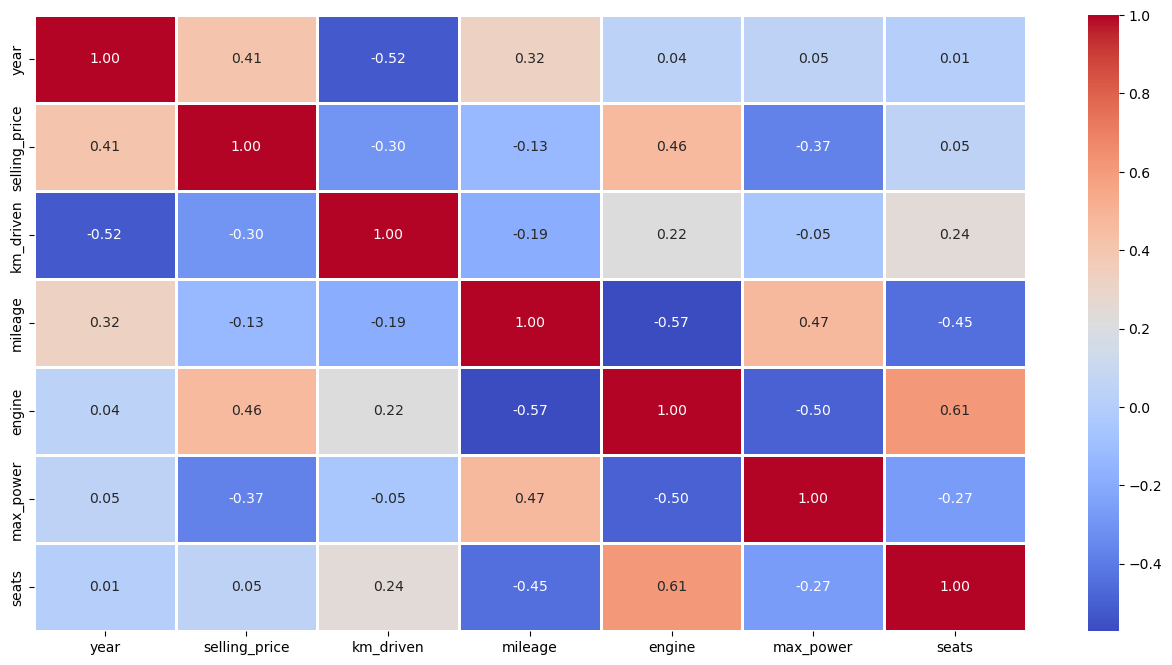

In [55]:
fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(df.corr(), annot=True, fmt='1.2f', annot_kws={'size' : 10}, linewidth=1, cmap="coolwarm")
plt.show()

In [56]:
df['CurrentYear']=2023
df['total_years']=df['CurrentYear']-df['year']
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,CurrentYear,total_years
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,7.0,5.0,2023,9
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,1.0,5.0,2023,9
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,7.0,5.0,2023,17
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,9.0,5.0,2023,13
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,8.0,5.0,2023,16


In [57]:
final_df = df.copy()            # Creating copy of created dataframe
final_df.drop(labels= ['name','year','CurrentYear'], axis= 1, inplace= True)          #droping unnecessary features

final_df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,total_years
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,7.0,5.0,9
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,1.0,5.0,9
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,7.0,5.0,17
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,9.0,5.0,13
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,8.0,5.0,16


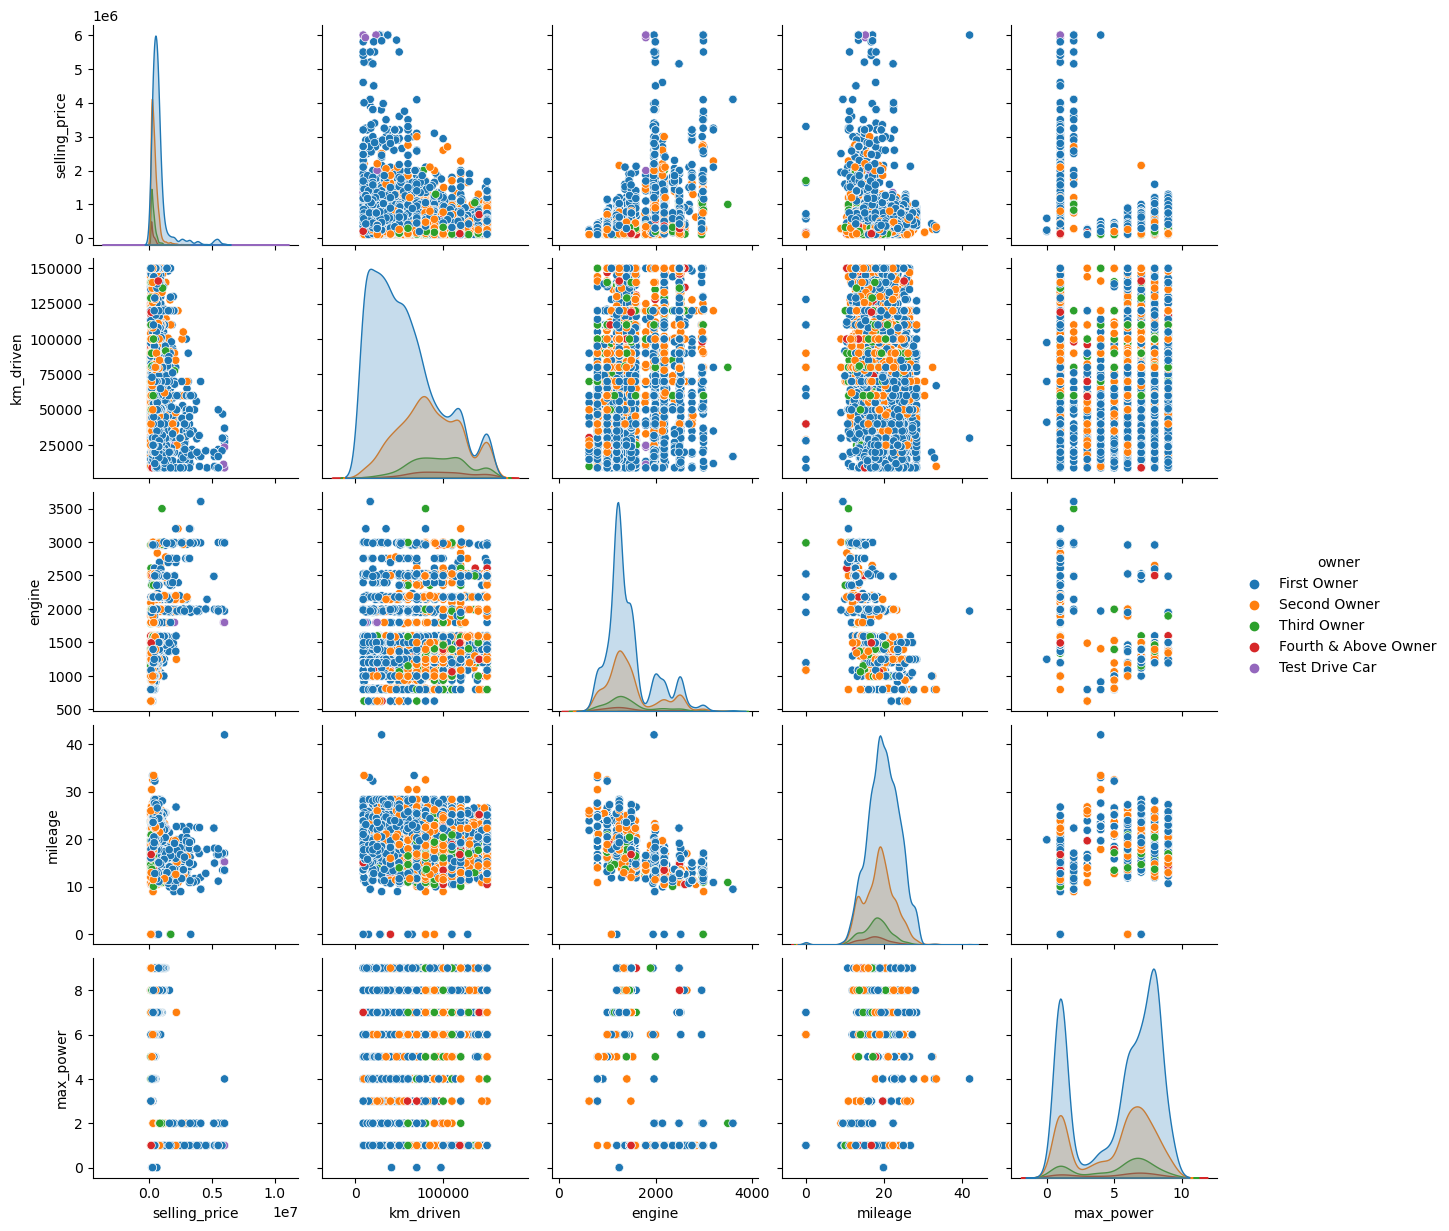

In [58]:
sns.pairplot(final_df[["selling_price", "km_driven", "engine", "mileage",
                   "max_power", "owner",'fuel']],hue='owner',diag_kind='kde')

In [59]:
final_df = pd.get_dummies(final_df)
final_df.head()

,selling_price,km_driven,mileage,engine,max_power,seats,total_years,fuel_CNG,fuel_Diesel,fuel_LPG,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,23.40,1248.0,7.0,5.0,9,0,1,0,...,0,1,0,0,1,1,0,0,0,0
1,370000,120000,21.14,1498.0,1.0,5.0,9,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,158000,140000,17.70,1497.0,7.0,5.0,17,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,225000,127000,23.00,1396.0,9.0,5.0,13,0,1,0,...,0,1,0,0,1,1,0,0,0,0
4,130000,120000,16.10,1298.0,8.0,5.0,16,0,0,0,...,0,1,0,0,1,1,0,0,0,0


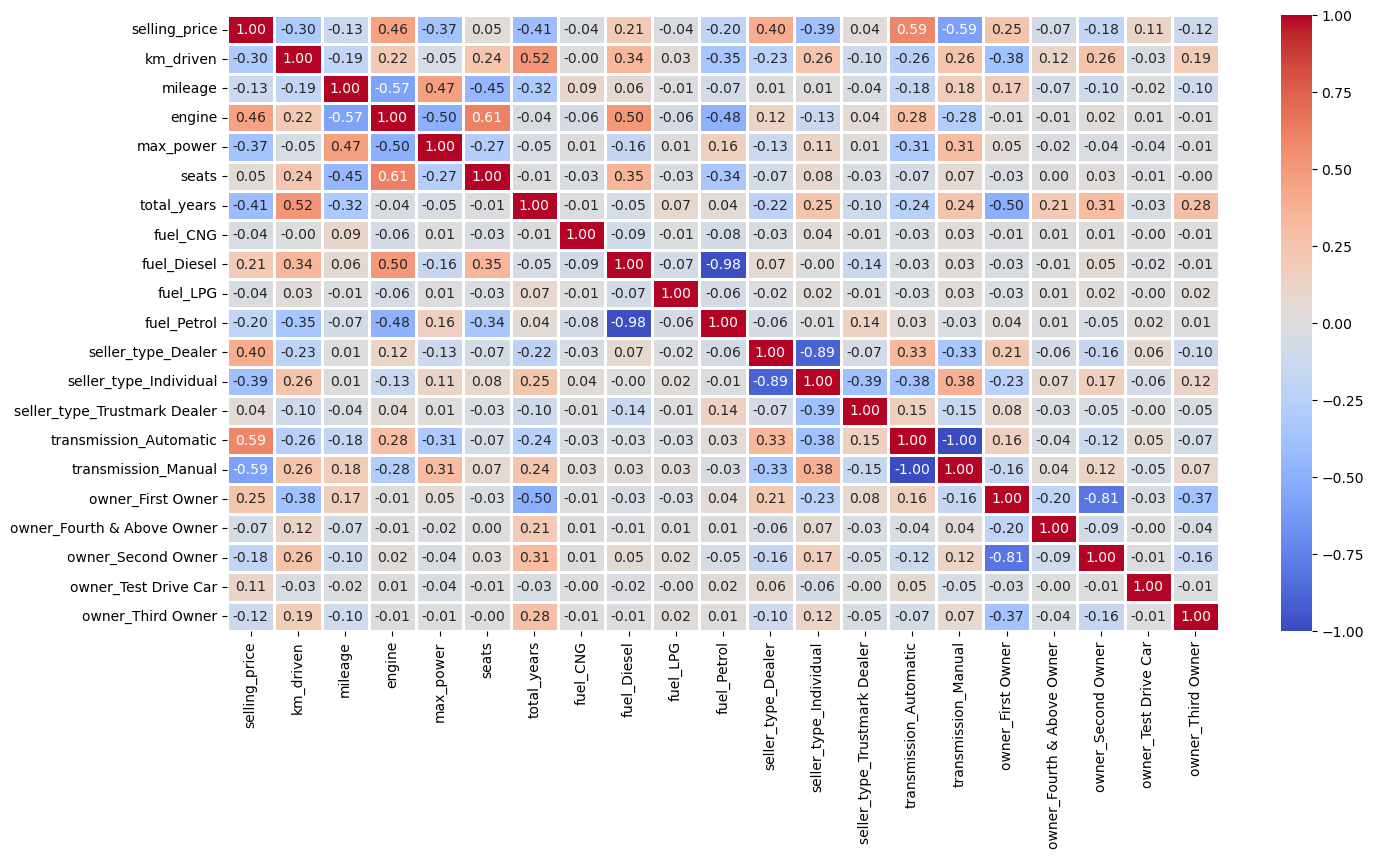

In [60]:
fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(final_df.corr(), annot=True, fmt='1.2f', annot_kws={'size' : 10}, linewidth=1, cmap="coolwarm")
plt.show()


In [61]:
final_df.dtypes

selling_price                     int64
km_driven                         int64
mileage                         float64
engine                          float64
max_power                       float64
seats                           float64
total_years                       int64
fuel_CNG                          uint8
fuel_Diesel                       uint8
fuel_LPG                          uint8
fuel_Petrol                       uint8
seller_type_Dealer                uint8
seller_type_Individual            uint8
seller_type_Trustmark Dealer      uint8
transmission_Automatic            uint8
transmission_Manual               uint8
owner_First Owner                 uint8
owner_Fourth & Above Owner        uint8
owner_Second Owner                uint8
owner_Test Drive Car              uint8
owner_Third Owner                 uint8
dtype: object

In [62]:
final_df['fuel_Diesel'] = final_df['fuel_Diesel'].astype('int64')
final_df['fuel_Petrol'] = final_df['fuel_Petrol'].astype('int64')
final_df['fuel_CNG'] = final_df['fuel_CNG'].astype('int64')
final_df['fuel_LPG'] = final_df['fuel_LPG'].astype('int64')
final_df['seller_type_Individual'] = final_df['seller_type_Individual'].astype('int64')
final_df['seller_type_Dealer'] = final_df['seller_type_Dealer'].astype('int64')
final_df['seller_type_Trustmark Dealer'] = final_df['seller_type_Trustmark Dealer'].astype('int64')
final_df['transmission_Automatic'] = final_df['transmission_Automatic'].astype('int64')
final_df['transmission_Manual'] = final_df['transmission_Manual'].astype('int64')
final_df['owner_First Owner'] = final_df['owner_First Owner'].astype('int64')
final_df['owner_Fourth & Above Owner'] = final_df['owner_Fourth & Above Owner'].astype('int64')
final_df['owner_Second Owner'] = final_df['owner_Second Owner'].astype('int64')
final_df['owner_Test Drive Car'] = final_df['owner_Test Drive Car'].astype('int64')
final_df['owner_Third Owner'] = final_df['owner_Third Owner'].astype('int64')


In [63]:
final_df.dtypes

selling_price                     int64
km_driven                         int64
mileage                         float64
engine                          float64
max_power                       float64
seats                           float64
total_years                       int64
fuel_CNG                          int64
fuel_Diesel                       int64
fuel_LPG                          int64
fuel_Petrol                       int64
seller_type_Dealer                int64
seller_type_Individual            int64
seller_type_Trustmark Dealer      int64
transmission_Automatic            int64
transmission_Manual               int64
owner_First Owner                 int64
owner_Fourth & Above Owner        int64
owner_Second Owner                int64
owner_Test Drive Car              int64
owner_Third Owner                 int64
dtype: object

In [64]:
final_df.rename(columns = {'owner_First Owne':'owner_First_Owner', 'owner_Second Owner':'owner_Second_Owner',
                              'owner_Third Owner':'owner_Third_Owner','owner_Fourth & Above Owner':'owner_Fourth_Above_Owner','owner_Test Drive Car':'owner_Test_Drive_Car'}, inplace = True)

In [65]:
final_df.isnull().sum()

selling_price                   0
km_driven                       0
mileage                         0
engine                          0
max_power                       0
seats                           0
total_years                     0
fuel_CNG                        0
fuel_Diesel                     0
fuel_LPG                        0
fuel_Petrol                     0
seller_type_Dealer              0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission_Automatic          0
transmission_Manual             0
owner_First Owner               0
owner_Fourth_Above_Owner        0
owner_Second_Owner              0
owner_Test_Drive_Car            0
owner_Third_Owner               0
dtype: int64

In [66]:
final_df['selling_price']=final_df['selling_price']/100000

In [67]:
final_df['selling_price']

0       4.50
1       3.70
2       1.58
3       2.25
4       1.30
        ... 
8123    3.20
8124    1.35
8125    3.82
8126    2.90
8127    2.90
Name: selling_price, Length: 8127, dtype: float64

In [68]:
x=final_df.drop(columns='selling_price')
y=final_df['selling_price']

In [69]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate,RandomizedSearchCV
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
import pickle
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold,GridSearchCV,StratifiedKFold
from sklearn.compose import make_column_transformer
import xgboost as xgb
from xgboost import XGBRegressor

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [71]:
regressor=RandomForestRegressor()

In [72]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [73]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [74]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [75]:
rf = RandomForestRegressor()

In [76]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [77]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  11.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  12.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [78]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [79]:
rf_random.best_score_

-2.529488801118146

In [80]:
predictions=rf_random.predict(x_test)

<Axes: xlabel='selling_price', ylabel='Density'>

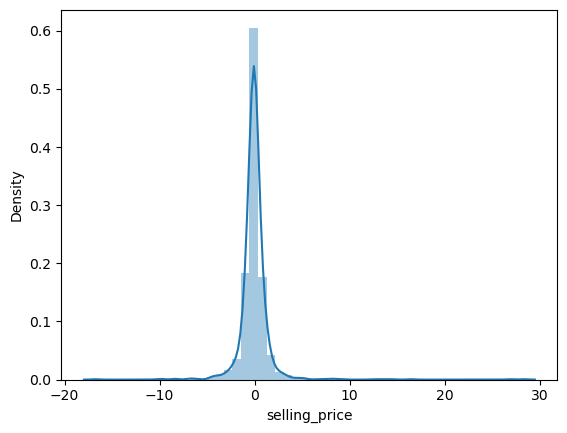

In [81]:
sns.distplot(y_test-predictions)

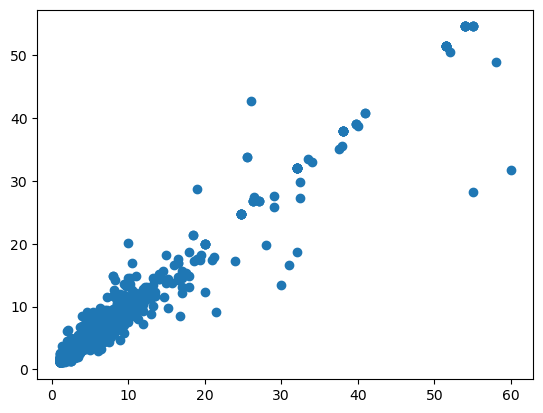

In [82]:
plt.scatter(y_test,predictions)

In [83]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.770411253105533
MSE: 3.099770027470442
RMSE: 1.760616377144789


In [84]:
import pickle
# open a file, where you ant to store the data
path='C:/Users/silam/OneDrive/Desktop/model/'
file = open(path + 'random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)